# Sommaire

[M0 - description des données](#M0---description-des-données)

[I. Préparation des données](#I.-Préparation-des-données)

[A. Importation des bibliothèques](#A.-Importation-des-bibliothèques)

[B. Importation et réorganisation des données](#B.-Importation-et-réorganisation-des-données)

[1. Importation et analyse générale du tableau](#1.-Importation-et-analyse-générale-du-tableau)

[2. Analyses univariées et bivariées](#2.-Analyses-univariées-et-bivariées)

[M1 - Analyse en Composantes Principales](#M1---Analyse-en-Composantes-Principales)

[I. Analyse de l'éboulis des valeurs propres](#I.-Analyse-de-l'éboulis-des-valeurs-propres)

[II. Représentation des variables et des individus](#II.-Représentation-des-variables-et-des-individus)

[M2 - Classification](#M2---Classification)

[I. HCPC](#I.--HCPC)

[II. K-means](#II.-K-means)

[M3 - Prediction](#M3---Prediction)

# M0 - description des données

## I. Préparation des données  

### A. Importation des bibliothèques

In [1]:
library(class)
library(readr)
library(tidyverse)
library(reshape2)
library(stringr)
library(corrplot)
library(ggpubr)
library(Hmisc)
library("FactoMineR")
library("factoextra")
library(rpart)
library(caret)
library("data.table")
library(mlbench)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v ggplot2 3.1.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths

corrplot 0.84 loaded
Loading required package: magrittr

Attaching package: 'magrittr'

The following object is masked from 'package:purrr':

    set_names

The following object is masked from 'package:tidyr':

    extract

Loading required package: lattice
Loading re

### B. Importation et réorganisation des données

#### 1. Importation et analyse générale du tableau

In [2]:
billets = read_csv('/Users/octav/Google Drive/OC_Data Analyst_GORAM Octave/Projets/Projet 6/csv/notes.csv')

Parsed with column specification:
cols(
  is_genuine = col_logical(),
  diagonal = col_double(),
  height_left = col_double(),
  height_right = col_double(),
  margin_low = col_double(),
  margin_up = col_double(),
  length = col_double()
)


In [3]:
billets %>% head()

is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
TRUE,171.81,104.86,104.95,4.52,2.89,112.83
TRUE,171.67,103.74,103.70,4.01,2.87,113.29
TRUE,171.83,103.76,103.76,4.40,2.88,113.84
TRUE,171.80,103.78,103.65,3.73,3.12,113.63
TRUE,172.05,103.70,103.75,5.04,2.27,113.55
TRUE,172.57,104.65,104.44,4.54,2.99,113.16


Stucture du tableau :  

In [4]:
str(billets)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	170 obs. of  7 variables:
 $ is_genuine  : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ diagonal    : num  172 172 172 172 172 ...
 $ height_left : num  105 104 104 104 104 ...
 $ height_right: num  105 104 104 104 104 ...
 $ margin_low  : num  4.52 4.01 4.4 3.73 5.04 4.54 3.97 3.54 4.06 4.63 ...
 $ margin_up   : num  2.89 2.87 2.88 3.12 2.27 2.99 2.9 3.19 3.33 3.02 ...
 $ length      : num  113 113 114 114 114 ...
 - attr(*, "spec")=
  .. cols(
  ..   is_genuine = col_logical(),
  ..   diagonal = col_double(),
  ..   height_left = col_double(),
  ..   height_right = col_double(),
  ..   margin_low = col_double(),
  ..   margin_up = col_double(),
  ..   length = col_double()
  .. )


Le tableau comporte 7 variables et 170 individus, de gauche à droite : 
- un booléen qui précise si le billet est vrai ou non 
- la diagonal des billets (en mm)
- la hauteur du bord gauche des billets (en mm)
- la hauteur du bord droit des billets (en mm)
- la marge entre le bord inférieur du billet et l'image de celui-ci (en mm)
- La marge entre le bord supérieur du billet et l'image de celui-ci (en mm)
- longueur du billet (en mm)

Valeurs notables : 

In [5]:
summary(billets)

 is_genuine         diagonal      height_left     height_right  
 Mode :logical   Min.   :171.0   Min.   :103.2   Min.   :103.1  
 FALSE:70        1st Qu.:171.7   1st Qu.:103.8   1st Qu.:103.7  
 TRUE :100       Median :171.9   Median :104.1   Median :104.0  
                 Mean   :171.9   Mean   :104.1   Mean   :103.9  
                 3rd Qu.:172.1   3rd Qu.:104.3   3rd Qu.:104.2  
                 Max.   :173.0   Max.   :104.9   Max.   :105.0  
   margin_low      margin_up         length     
 Min.   :3.540   Min.   :2.270   Min.   :110.0  
 1st Qu.:4.050   1st Qu.:3.013   1st Qu.:111.9  
 Median :4.450   Median :3.170   Median :112.8  
 Mean   :4.612   Mean   :3.170   Mean   :112.6  
 3rd Qu.:5.128   3rd Qu.:3.330   3rd Qu.:113.3  
 Max.   :6.280   Max.   :3.680   Max.   :114.0  

Il ne semble pas y avoir de valeurs abérantes. 

In [6]:
sum(is.na(billets))

sum(duplicated(billets))

[1] 0

[1] 0

#### 2. Analyses univariées et bivariées

Chaque individu est unique et il n'y a pas de valeur manquante.

Il faut étudier si il existe des différences majeurs pour les variables étudiées en fonction de l'authenticité des billets.

In [7]:
billets_authenticite = billets %>% group_by(is_genuine)
billets_authenticite %>% summarise_all("mean")

is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
FALSE,171.8899,104.2304,104.1456,5.281571,3.334571,111.6607
TRUE,171.9761,103.9515,103.7759,4.143500,3.055500,113.2072


Des différences plus ou moins notables peuvent être constatées, il est nécessaire d'étudier la dispersion des variables.

In [8]:
melt_billets <- melt(billets_authenticite)
#permet de décomposer les variables en une colonne variable et une colonne value
head(melt_billets,1)

Using is_genuine as id variables


is_genuine,variable,value
TRUE,diagonal,171.81


In [9]:
means <- aggregate(value ~  is_genuine, melt_billets, mean)


Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message in dev.print(png, "boxplot.png"):
"need to specify one of 'width' and 'height'"Warning message in device(...):
"'width=6, height=6' ne sont probablement pas des valeurs en pixels"

png 
  2

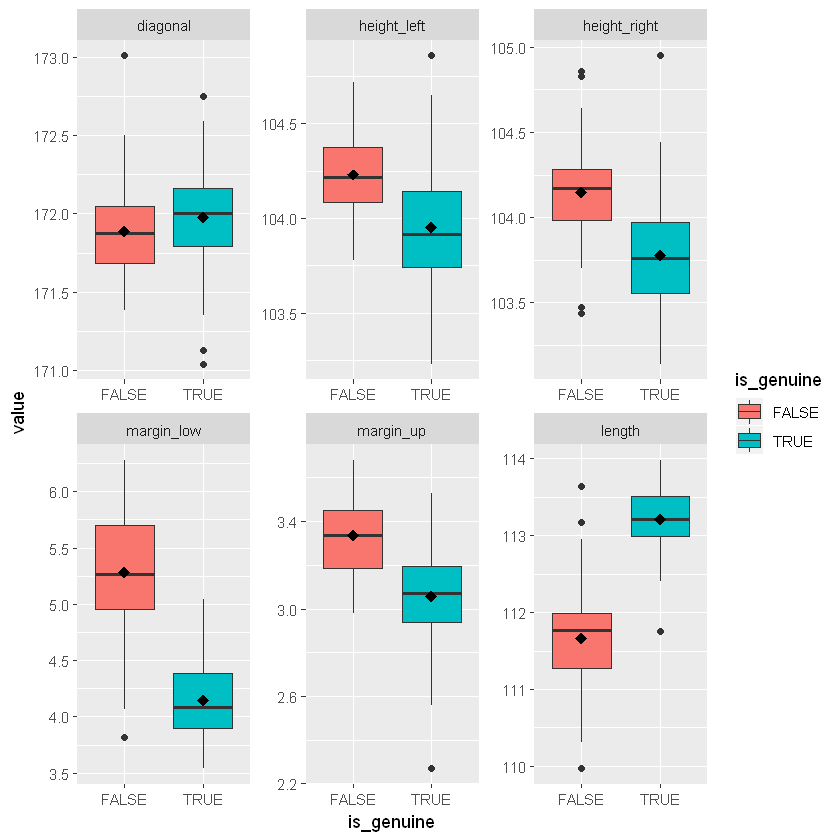

In [10]:
ggplot(melt_billets, aes(x=is_genuine, y=value, fill=is_genuine)) + 
    geom_boxplot() +
    facet_wrap(~variable, scale="free") +
stat_summary(fun.y=mean, colour="black", geom="point", 
               shape=18, size=3,show_guide = FALSE)

dev.print(png,'boxplot.png')

Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."

png 
  2

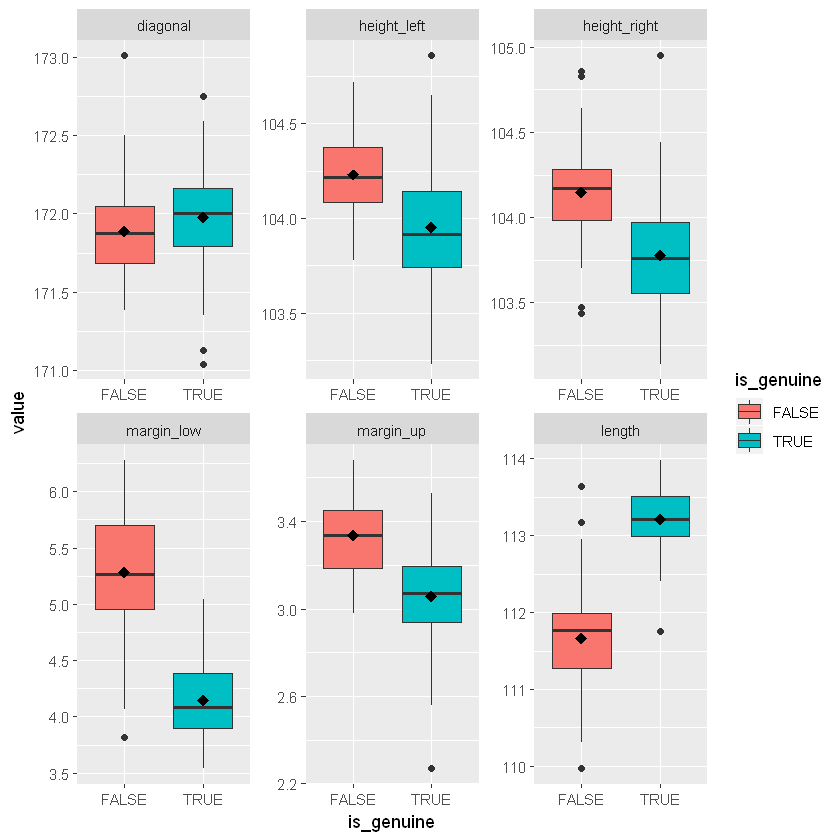

In [11]:
ggplot(melt_billets, aes(x=is_genuine, y=value, fill=is_genuine)) + 
    geom_boxplot() +
    facet_wrap(~variable, scale="free") +
stat_summary(fun.y=mean, colour="black", geom="point", 
               shape=18, size=3,show_guide = FALSE)

dev.print(device = png, file = "boxplot", width = 600)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


png 
  2

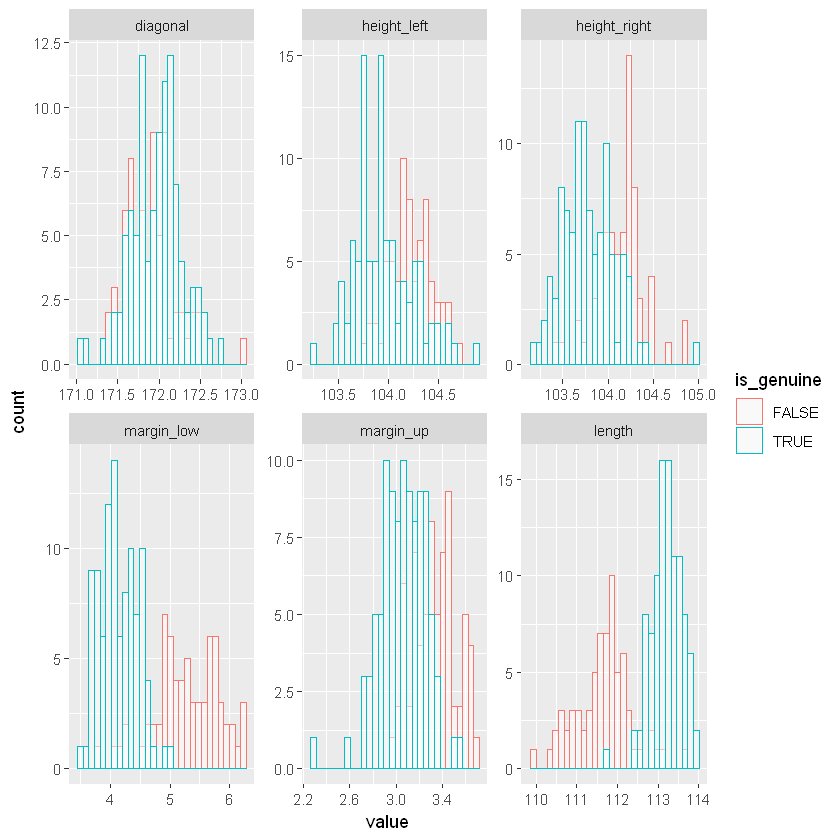

In [12]:
ggplot(melt_billets, aes(x=value,  color=is_genuine)) +
  geom_histogram(fill="white", alpha=0.5, position="identity" ) +
facet_wrap(~variable, scale="free")

dev.print(device = png, file = "barplot", width = 600)

La comparaison de la dispersion des variables en fonction du caractère authentique ou non des billets permet de voir les variables les plus déterminantes pour discriminer les vrais billets des faux billets. 

Ainsi, on constate que la variable "diagonal" ne permet pas une telle distinction, mais les autres le permettent. C'est particulièrement le cas des variables "margin_low" et "length".

In [13]:
anova_auth_billets =  aov(is_genuine ~ . , data=billets) 

summary(anova_auth_billets)

              Df Sum Sq Mean Sq F value   Pr(>F)    
diagonal       1  0.798   0.798   27.34 5.16e-07 ***
height_left    1 11.752  11.752  402.64  < 2e-16 ***
height_right   1  3.856   3.856  132.12  < 2e-16 ***
margin_low     1 11.360  11.360  389.21  < 2e-16 ***
margin_up      1  7.043   7.043  241.30  < 2e-16 ***
length         1  1.609   1.609   55.12 5.97e-12 ***
Residuals    163  4.758   0.029                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Toute les p valeurs sont inférieurs à 0.05, aussi, il est possible de rejeter l'hypothèse nulle pour toutes les variables étudiées. Néanmoins, la p valeur pour la variable "diagonal" est bien plus grande que pour les autres. Ceci confirme qu'il ne s'agit pas de la variable la plus intéressante pour distinguer les vrais et les faux billets

Il faut ensuite chercher les variables corélées avec la corrélation de Spearman :

In [14]:
billets_cor = cor(billets, method = "spearman")

rcorr(as.matrix(billets),type="spearman")
#Comme résultat, la fonction rcorr() renvoie une liste avec les éléments suivants : 
#- r : la matrice de corrélation. 
#- n : la matrice du nombre d’observations utilisé dans l’analyse de chaque paire de variables. 
#- P : les p-values correspondant aux niveaux de significativité des corrélations.



             is_genuine diagonal height_left height_right margin_low margin_up
is_genuine         1.00     0.18       -0.49        -0.58      -0.78     -0.59
diagonal           0.18     1.00        0.30         0.18      -0.17     -0.02
height_left       -0.49     0.30        1.00         0.75       0.46      0.35
height_right      -0.58     0.18        0.75         1.00       0.56      0.39
margin_low        -0.78    -0.17        0.46         0.56       1.00      0.16
margin_up         -0.59    -0.02        0.35         0.39       0.16      1.00
length             0.80     0.13       -0.46        -0.45      -0.61     -0.54
             length
is_genuine     0.80
diagonal       0.13
height_left   -0.46
height_right  -0.45
margin_low    -0.61
margin_up     -0.54
length         1.00

n= 170 


P
             is_genuine diagonal height_left height_right margin_low margin_up
is_genuine              0.0199   0.0000      0.0000       0.0000     0.0000   
diagonal     0.0199              0.00

L'essentiel des variables semble corrélées entre elles puisque la p valeur représentant l'hypothèse de corrélation est dans la plus part des cas inférieure à 0.05, ce qui est le seuil significatif retenu. 

Les exceptions sont les variables "margin_up" et "diagonal" qui ne semblent pas corrélées et les variables "length" et "diagonal".

png 
  2

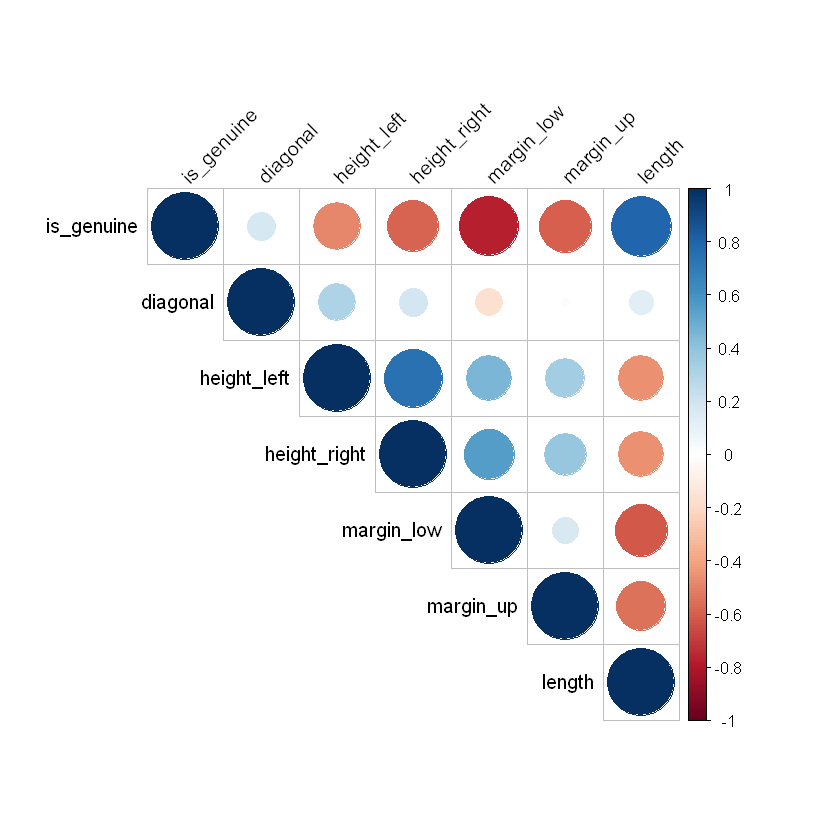

In [15]:
corrplot(billets_cor, type="upper", order = c("original") , tl.col="black", tl.srt=45)
#corrélogramme

dev.print(device = png, file = "corrélogramme", width = 600)

Les variables les plus corrélées avec la variable "is_genuine" sont les variables "margin_low" et "length", elles permettent donc de distinguer avec efficacité, les vrais et les faux billets.

# M1 - Analyse en Composantes Principales 

## I. Analyse de l'éboulis des valeurs propres

In [16]:
billets2 = billets
billets2$is_genuine = as.integer(as.logical(billets2$is_genuine))

In [17]:
billets_acp = PCA(billets[-1],  scale.unit = TRUE, graph = TRUE,)

billets_acp2 =  PCA(billets2,  scale.unit = TRUE, graph = TRUE,quanti.sup = 1)
# quanti.sup permet d'indiquer les variables illustratives. Elles sont affichées mes ne pondérent pas l'ACP

In [18]:
billets_acp = PCA(billets[-1],  scale.unit = TRUE, graph = TRUE)
# scale.unit = TRUE permet de standardiser les données. Elles sont alors centrées-réduites

ind <- get_pca_ind(billets_acp)
# permet d'obtenir un ensemble de résultats pour les individus étudiées pour l'APC

var <- get_pca_var(billets_acp)
# permet d'obtenir un ensemble de résultats pour les variables étudiées pour l'APC

ind2 <- get_pca_ind(billets_acp2)
var2 <- get_pca_var(billets_acp2)




png 
  2

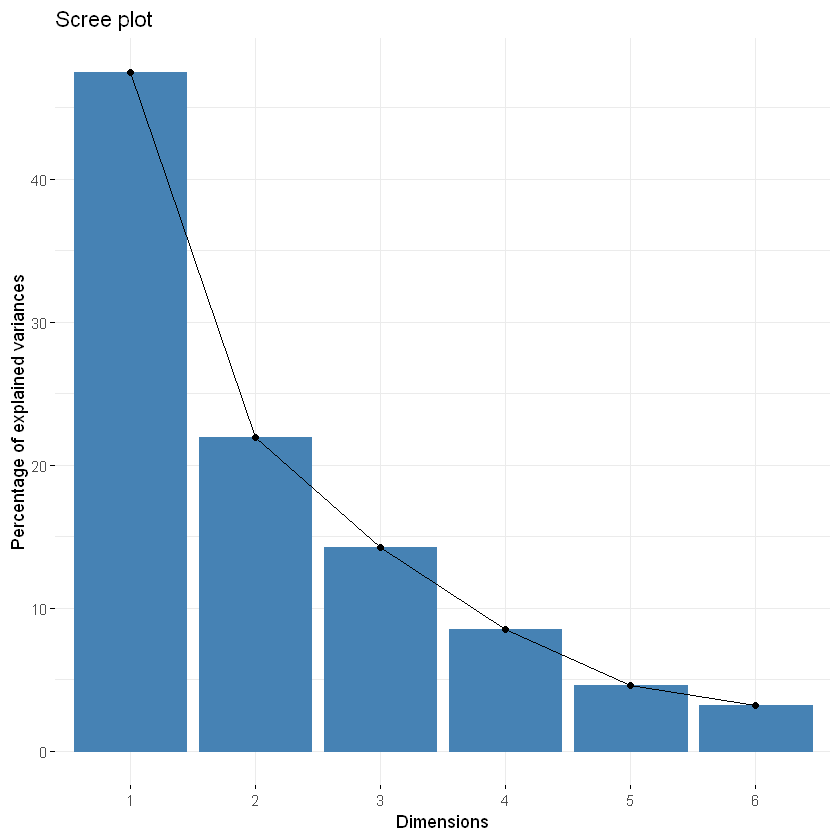

In [19]:
fviz_eig(billets_acp)
dev.print(device = png, file = "eboulie", width = 600)

En utilisant le critère du coude on peut constater que les interties des axes après le 4ème axe sont faibles, il est donc possible de choisir d'analyser les 4 premiers axes.

Il est utile de vérifier données numériques :

In [20]:
get_eigenvalue(billets_acp)


,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,2.8468752,47.447921,47.44792
Dim.2,1.3174264,21.957106,69.40503
Dim.3,0.8540715,14.234524,83.63955
Dim.4,0.5115777,8.526295,92.16585
Dim.5,0.2767693,4.612822,96.77867
Dim.6,0.1932799,3.221331,100.00000


La quantité de variance expliquée par chaque composante principale est mesurée par ce que l’on appelle valeur propre. Nos données sont ici normalisées et nous avons 6 variables et donc 6 dimensions, la valeur propre cumulée est donc de 6.


Nous constatons que 3 dimensiosn représentent au moins 10% de la variance totale, et environ 83.64% de la variance totale en cumulé. 


Généralement la valeur seuil de 10% est prise ou une valeur cumulée de 70% lorsque l'on classe les axes principaux par ordre de de valeur propre. 

Il est possible de vérifier la représentativité des 5 premiers axes pour chaque variable :

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
diagonal,0.01528551,0.80078062,0.006749023,0.160277016,0.01402321
height_left,0.64368476,0.15162351,0.012870906,0.039549943,0.14185600
height_right,0.68862579,0.07309119,0.020210521,0.107750562,0.06563918
margin_low,0.52890394,0.13535760,0.224596566,0.026251515,0.02692592
margin_up,0.35382201,0.02623626,0.575887893,0.009370463,0.01041033
length,0.61655322,0.13033718,0.013756551,0.168378228,0.01791471


png 
  2

png 
  3

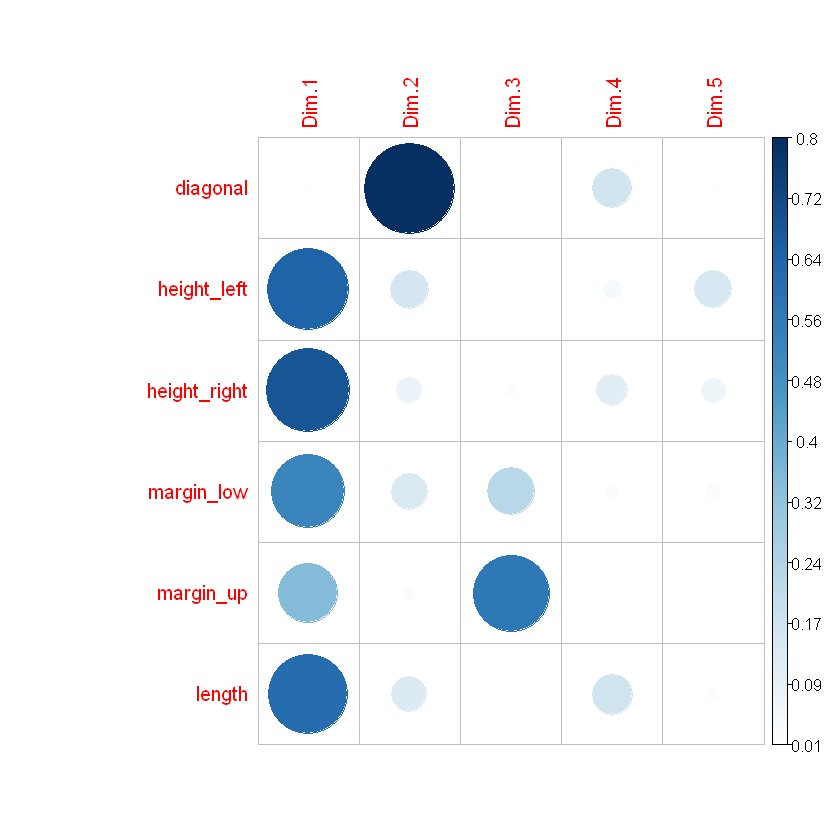

In [21]:
var2$cos2
# qualité de représentation, égal au carré des coordonnées (cos²), plus le chiffre est élevé, plus la représentation est bonne 


corrplot(var2$cos2, is.corr=FALSE)

dev.print(device = png, file = "pca_dim", width = 600)

dev.off()

Il est possible de constater que les variables sont toutes bien représentées sur au moins l'un des 3 premiers axes.
La variable "diagonal" est bien représentée sur le 2ème axe alors que la variable "marin_up" est représentée au mieux sur 3ème axe. Le reste des variable est doit être analysé sur l'axe 1.

## II. Représentation des variables et des individus

__Représentation des individus sur le premier plan factoriel :__

png 
  2

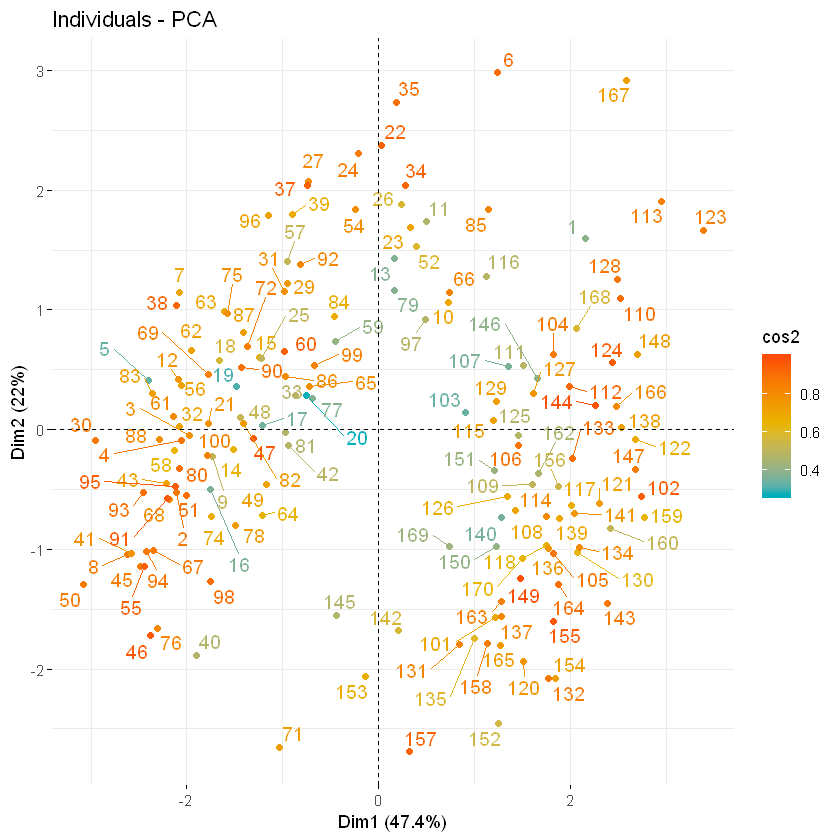

In [22]:
fviz_pca_ind (billets_acp, col.ind = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
               select.ind = list(cos2 = 0.25), # supprimer les individus les moins représentatifs
             repel = TRUE # Évite le chevauchement de texte
             )

dev.print(device = png, file = "indiv_cos2", width = 600)

Les individus les moins bien représentés sont ceux vers le centre du repère. L'essentiel des individus sont bien représentés.

__Contribution des individus au premier plan factoriel :__

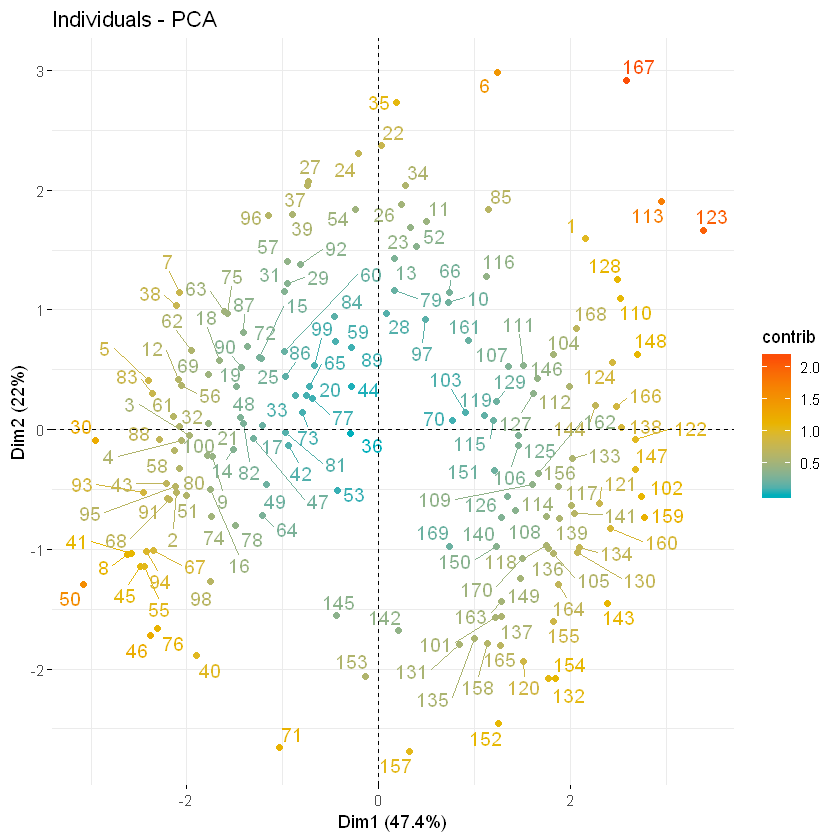

In [23]:
fviz_pca_ind (billets_acp, col.ind = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )



Les individus contribuent de manière très variable au premier plan factoriel, 2 individus ont une contribution particulièrement élevée (167 et 123). Les individus au centre contribuent moins aux axes.

__Qualité de la représentation des variables sur le premier plan factoriel :__

png 
  2

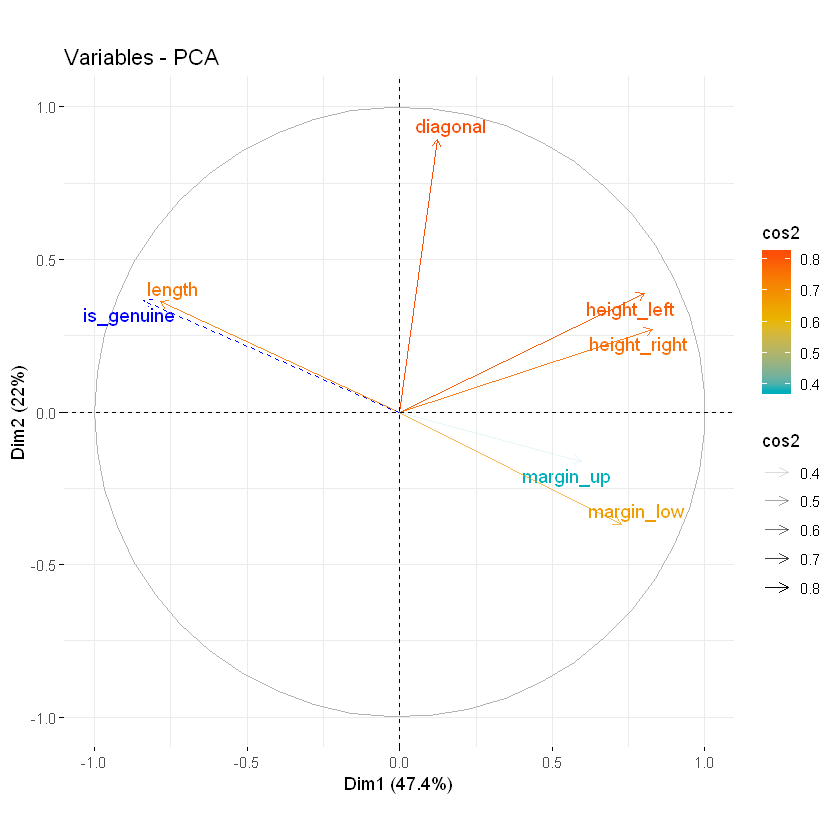

In [24]:
fviz_pca_var(billets_acp2 , axes = c(1, 2), col.var = "cos2",alpha.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE 
             )

dev.print(device = png, file = "variable_cos2", width = 600)

Les variables qui représentent la hauteur des bords gauche et droite des billets sont bien représentées à droit du premier axe et elle sont corrélées comme ont peut s'y attendre. 

La variable qui concerne la largeur est également bien représentée sur le premier axe et corrélée négativement avec les deux variables précédemment citées.

On peut également noter que les variables "margin_up" et "margin_low" sont liées au premier axe mais elles sont moins bien représentées, en particulier la variable "margin_up".

__Le premier Axe__ du premier plan factoriel semble correspondre à la __largueur et à la hauteur des billets__.

__Le deuxième Axe__ du premier plan factoriel est principalement lié à la __variable "diagonal"__ laquelle est bien représentée sur ce plan.

__Représentation des variables et des individus sur le premier plan factoriel :__

png 
  2

png 
  3

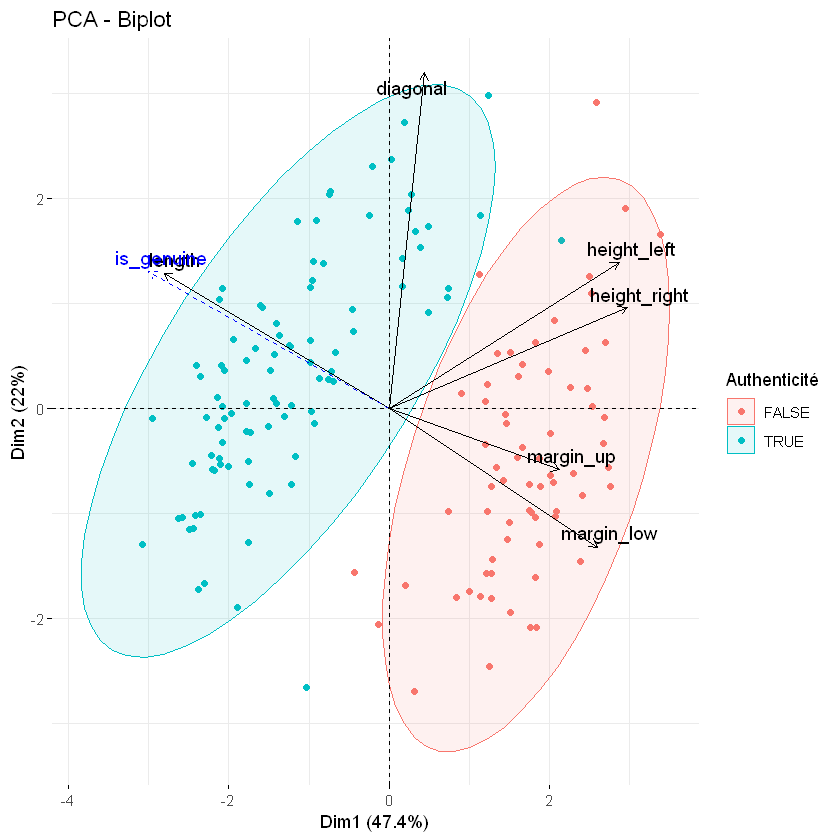

In [25]:
fviz_pca_biplot (billets_acp2,
                col.ind = billets$is_genuine, palette = "jco",
                axes = c(1, 2),
                addEllipses = TRUE, label = c("var") ,
                select.ind = list(cos2 = 0.25), #permet de supprimer les individus les moins représentatifs (cos2 < 0.25)
                col.var = "black", repel = TRUE,
                legend.title = "Authenticité")

dev.print(device = png, file = "pca_genuine_dim12", width = 600)


dev.off()



Nous constatons que les individus sont bien séparés en deux groupes sur le premier plan factoriel.

Les faux billets sont concentrés vers la droite du plan, ils se distinguent par des bords droits et gauches grands, et des marges supérieures et un inférieures à l'image également grandes. Par ailleurs il faut rappeler que la marge supérieure est mal représentée sur ce plan.

Les vrais billets sont concentrés à gauche du plan et ils ont une plus grande diagonale et une plus grande longeur. 

Ces informations renforce ce que nous avions constaté en mesurant la dispersion et la moyenne de deux groupes. 

Il y a donc bien deux groupes, identifiables et bien caractérisés. 

__Représentation et contributions des individus aux axes 1 et 3 :__

png 
  2

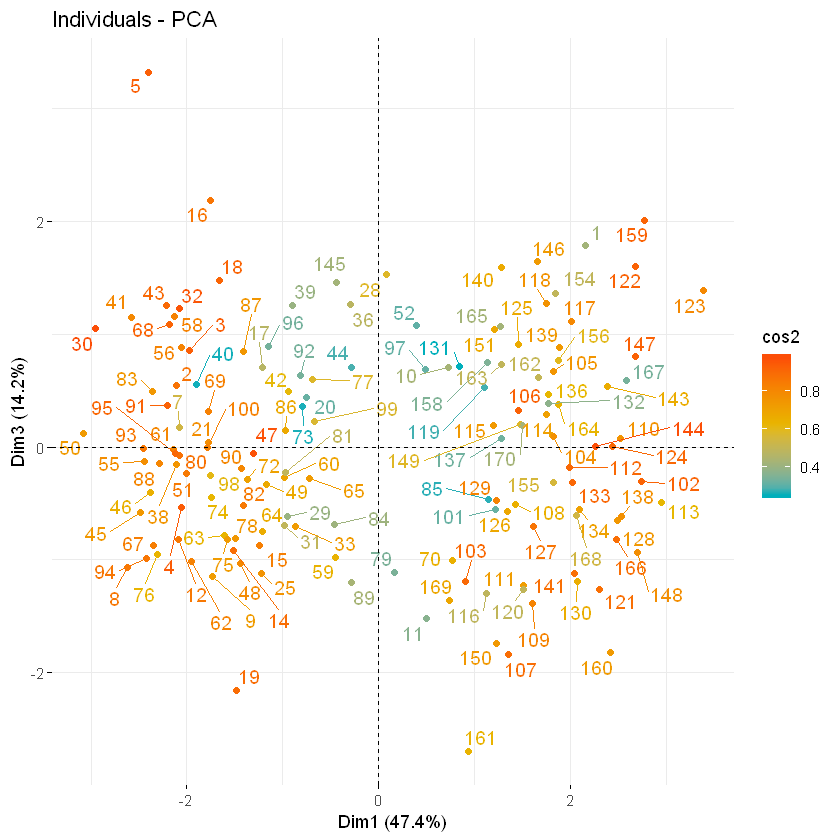

In [26]:
fviz_pca_ind (billets_acp, col.ind = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
               select.ind = list(cos2 = 0.25),
               axes = c(1, 3),
             repel = TRUE # Évite le chevauchement de texte
             )

dev.print(device = png, file = "pca_indiv_13", width = 600)

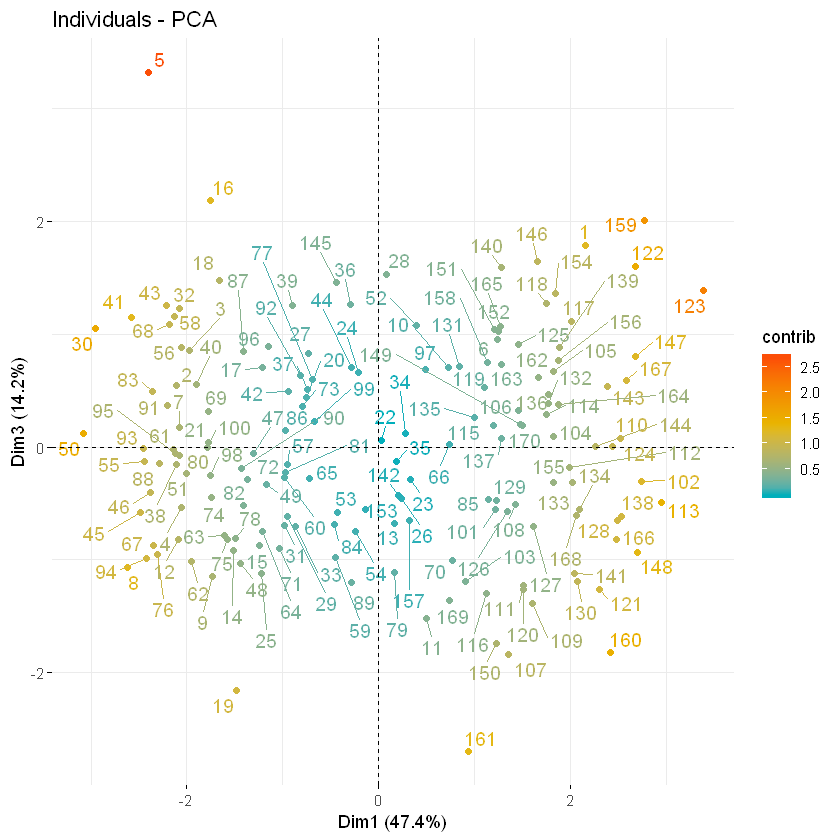

In [27]:
fviz_pca_ind (billets_acp, col.ind = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
               axes = c(1, 3),
             repel = TRUE # Évite le chevauchement de texte
             )

La contribution et la représentation des individus sont comparables avec celles du premier plan factoriel. 

__Représentation des variables aux axes 1 et 3 :__

png 
  2

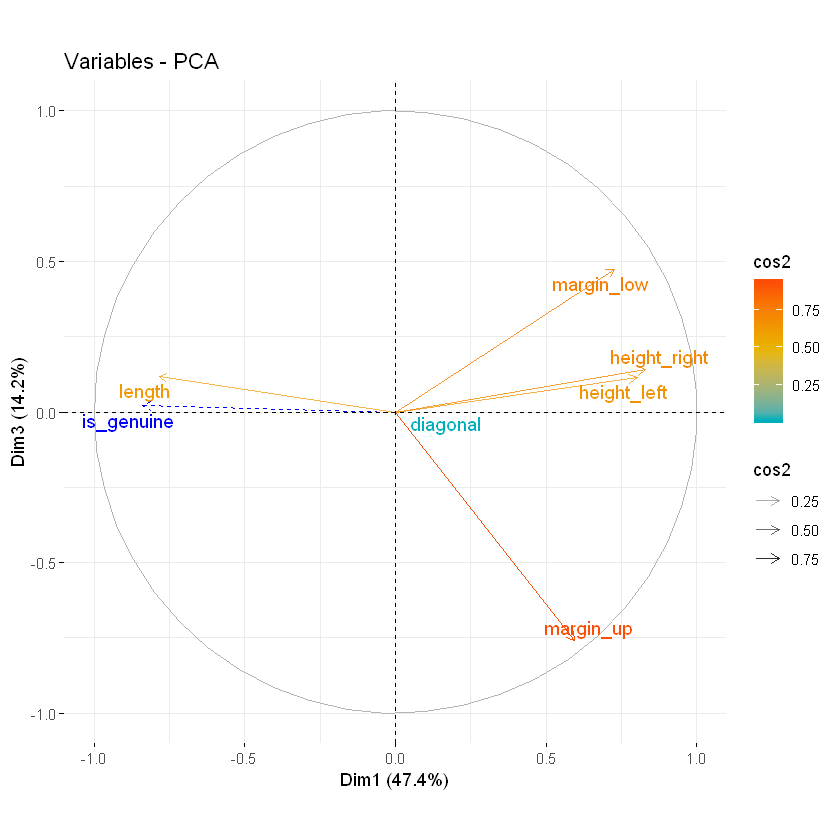

In [28]:
fviz_pca_var(billets_acp2 , axes = c(1, 3), col.var = "cos2",alpha.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE 
             )

dev.print(device = png, file = "pca_variable_13", width = 600)

La variable diagonale est mal représentée sur le plan composé des axes 1 et 3.

La variable "margin_up" est bien représentée sur ce plan alors qu'elle était mal représentée sur le premier plan factoriel.

L'axe 1 met toujours en rapport à droite les variables "height_right" et "height_left" négativement corrélées avec la variable "length".

L'axe 3 et principalement représentatif de variables "margin_low" et "margin_up".

Tenant compte des constations antérieures, il peut être considéré que le fait que la variable "diagonal" soit mal représentée est négligeable car elle est peu corrélée avec la variable "is_genuine".

png 
  2

png 
  3

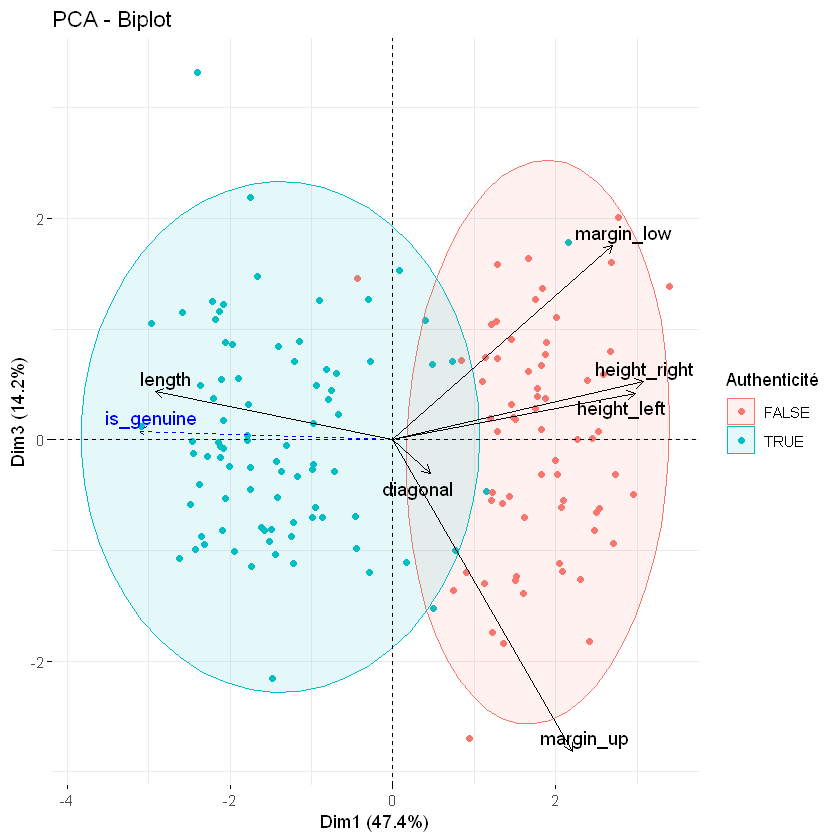

In [29]:
fviz_pca_biplot (billets_acp2,
                col.ind = billets$is_genuine, palette = "jco",
                axes = c(1, 3),
                addEllipses = TRUE, label = c("var") ,
                col.var = "black", repel = TRUE,
                  select.ind = list(cos2 = 0.25),
                legend.title = "Authenticité")

dev.print(device = png, file = "pca_genuine_dim13", width = 600)


dev.off()

Ici, les deux groupes sont toujours bien présents et caractérisés par les mêmes variables.

On constate qu'un certain nombre d'individus paratagent de caractèristiques communes.

Ce plan ne permet pas de modéliser de manière moins évidente la séparation entre les deux groupes d'individus. 

L'ACP nous permet de distinguer les variables les mieux corélées mais également de distinguer comment se répartissent les individus en fonction du ces variables. Ici on constate une forte corrélation entre les variables "height_right", "heigt_left", "margin_up" et "margin_low". Une valeur élevées pour ces variables est typique des faux billets.

La variable "length" est négativement corrélée avec ces variables. Globalement l'axe 1 correspond aux variables qui permettent de déterminer au mieux quels sont les vrais et les faux billets. 

Les axe 2 et 3 permettent respectivement de distinguer les variables "diagonal" et margin_up".

Enfin les deux groupes sont bien représentés via ces modélisations.

## M2 - Classification 

### I. HCPC

In [30]:
billets_hcpc = HCPC(billets_acp, graph = FALSE,nb.clust=2)

Le cluster 1 a des valeurs remarquables pour les variables "height_left", "height_right".

Le cluster 2 se distingue par ses valeurs pour la variable "diagonal".

Le cluster 3 a les valeurs les plus extrêmes pour les variables "margin_low", "margin_up" et "length".

png 
  2

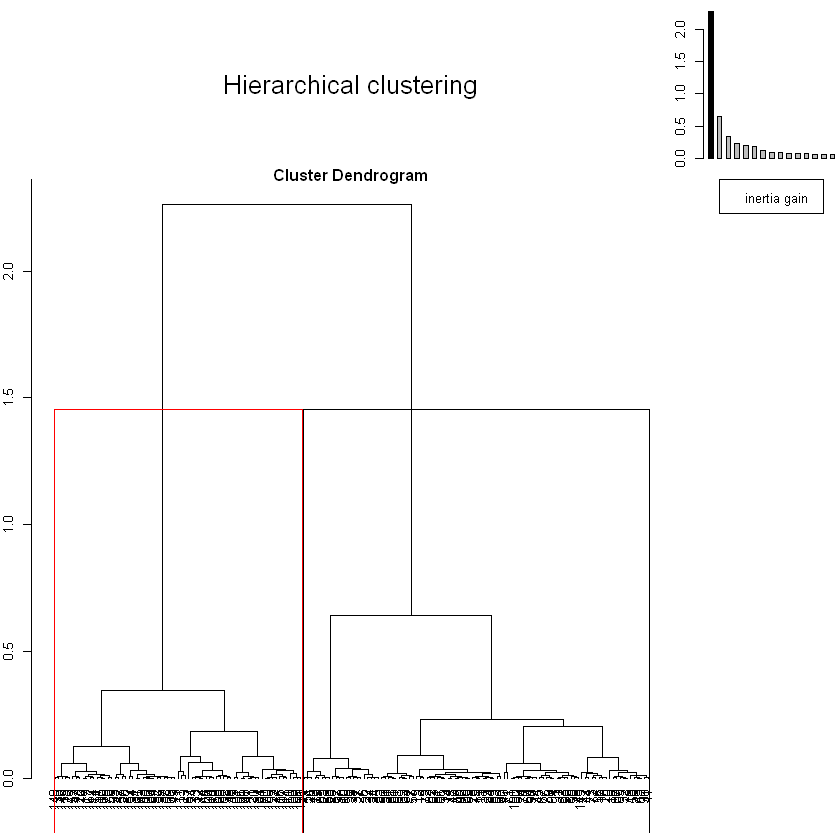

In [31]:
plot.HCPC(billets_hcpc, rect=TRUE, choice="tree", draw.tree=TRUE, tree.barplot=TRUE )

dev.print(device = png, file = "dendogram", width = 600)

Warning message:
"funs() is soft deprecated as of dplyr 0.8.0
please use list() instead

# Before:
funs(name = f(.)

# After: 
list(name = ~f(.))
This warning is displayed once per session."

clust,diagonal,height_left,height_right,margin_low,margin_up,length
1,0.7071068,-0.7071068,-0.7071068,-0.7071068,-0.7071068,0.7071068
2,-0.7071068,0.7071068,0.7071068,0.7071068,0.7071068,-0.7071068


png 
  3

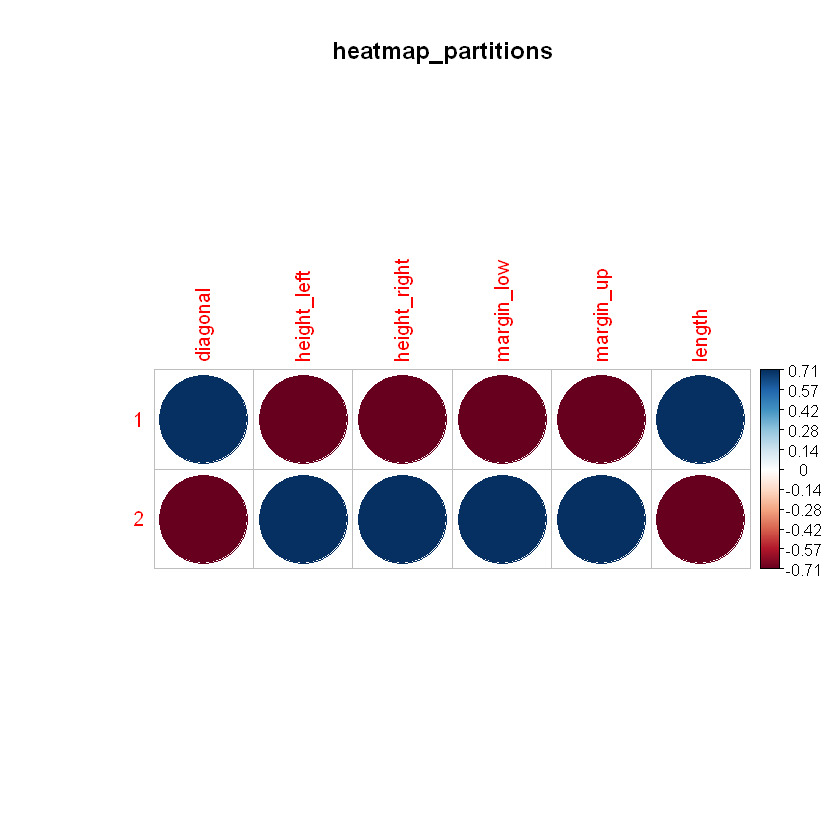

In [32]:
# Récupération d'un tableau avec les variables étudiées et les clusters indiqués par individu
billets_clust = billets_hcpc$data.clust
billets_centroides = billets_clust %>% group_by(clust) 

# Création d'un tableau avec les centroïdes pour chaque variable
billets_centroides = billets_centroides %>% summarise(
  diagonal = mean(diagonal),
  height_left = mean(height_left),
    height_right = mean(height_right),
    margin_low = mean(margin_low),
    margin_up = mean(margin_up),
    length = mean(length))

# Transformation en variables centrées réduites de centroïdes
billets_centroides_centres_reduit3 = billets_centroides %>%
   mutate_at(c(-1), funs(c(scale(.))))

billets_centroides_centres_reduit3

billets_centroides_centres_reduit4 = billets_centroides_centres_reduit3[-1]

billets_centroides_centres_reduit_matrice2 <- as.matrix(billets_centroides_centres_reduit4[,])

corrplot(billets_centroides_centres_reduit_matrice2, is.corr=FALSE, method = "circle")
title(main="heatmap_partitions")
dev.off()

options(repr.plot.width=8, repr.plot.height=8)
corrplot(billets_centroides_centres_reduit_matrice2, is.corr=FALSE, method = "circle")
title(main="heatmap_partitions")



png 
  2

png 
  3

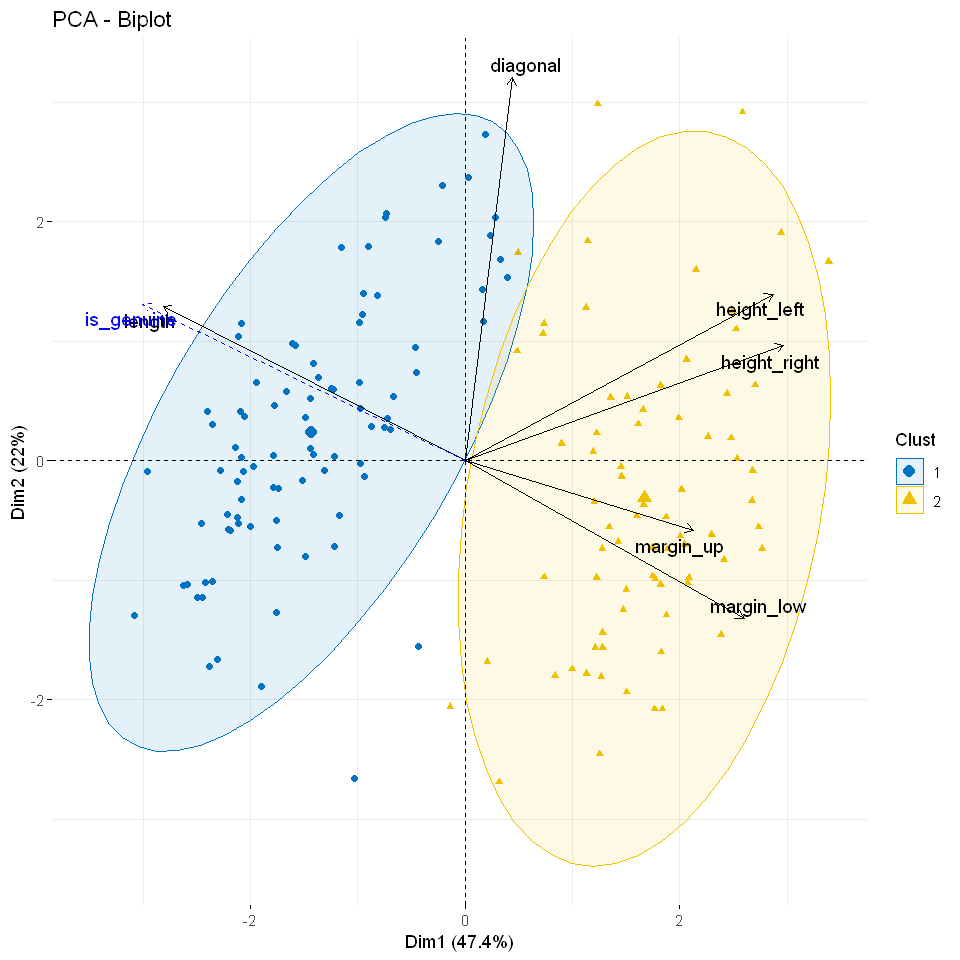

In [33]:
fviz_pca_biplot (billets_acp2,
                col.ind = billets_clust$clust, palette = "jco",
                addEllipses = TRUE, label = c("var") ,
                col.var = "black", repel = TRUE,
                 select.ind = list(cos2 = 0.25),
                legend.title = "Clust")

dev.print(device = png, file = "hcpc is genuine dim12", width = 600)



dev.off()

Le cluster 1 se rapproche beaucoup du groupe des vrais billets et le cluster 2 a celui des faux billets.

In [34]:
confusion_clusters = merge(billets, billets_clust, sort = FALSE)

In [35]:
table(confusion_clusters$clust, confusion_clusters$is_genuine)

   
    FALSE TRUE
  1     1   92
  2    69    8

Le résultat est de 

- 92 vrais positifs
- 8 vrais négatiffs
- 69 faux positifs 
- 1 faux négatif

In [36]:
precision_vrai_positifs = 100 - round((1/70) * 100,2)
precision_vrai_positifs

[1] 98.57

In [37]:
precision_vrai_negatifs = 100 - round((8 / 100) * 100,2)
precision_vrai_negatifs

[1] 92

In [38]:
precision_dectetion_billets <- c(precision_vrai_positifs,precision_vrai_negatifs)
precision_dectetion_billets <- mean(precision_dectetion_billets)
precision_dectetion_billets

[1] 95.285

In [39]:
confusion_clusters$clust <- as.character(confusion_clusters$clust)
confusion_clusters$clust[confusion_clusters$clust == "1"] <- "TRUE"

confusion_clusters$clust <- as.character(confusion_clusters$clust)
confusion_clusters$clust[confusion_clusters$clust == "2"] <- "FALSE"

confusion_clusters$clust = as.logical(confusion_clusters$clust)

In [40]:
confusionMatrix(table(confusion_clusters$clust, confusion_clusters$is_genuine))

Confusion Matrix and Statistics

       
        FALSE TRUE
  FALSE    69    8
  TRUE      1   92
                                          
               Accuracy : 0.9471          
                 95% CI : (0.9019, 0.9755)
    No Information Rate : 0.5882          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8923          
                                          
 Mcnemar's Test P-Value : 0.0455          
                                          
            Sensitivity : 0.9857          
            Specificity : 0.9200          
         Pos Pred Value : 0.8961          
         Neg Pred Value : 0.9892          
             Prevalence : 0.4118          
         Detection Rate : 0.4059          
   Detection Prevalence : 0.4529          
      Balanced Accuracy : 0.9529          
                                          
       'Positive' Class : FALSE           
                                          

### II. K-means

In [41]:

billets_kmeans = kmeans(billets[-1],2)
billets_kmeans

K-means clustering with 2 clusters of sizes 69, 101

Cluster means:
  diagonal height_left height_right margin_low margin_up   length
1 171.8907    104.2267     104.1461   5.275362  3.332899 111.6252
2 171.9747    103.9568     103.7792   4.159010  3.059406 113.2161

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

Within cluster sum of squares by cluster:
[1] 63.8563 55.9585
 (between_SS / total_SS =  58.2 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [42]:
set.seed(135)

kmean_clust = billets

kmean_clust$clust <- billets_kmeans$cluster

head(kmean_clust)

is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,clust
TRUE,171.81,104.86,104.95,4.52,2.89,112.83,2
TRUE,171.67,103.74,103.70,4.01,2.87,113.29,2
TRUE,171.83,103.76,103.76,4.40,2.88,113.84,2
TRUE,171.80,103.78,103.65,3.73,3.12,113.63,2
TRUE,172.05,103.70,103.75,5.04,2.27,113.55,2
TRUE,172.57,104.65,104.44,4.54,2.99,113.16,2


In [43]:
kmean_clust$clust <- as.character(kmean_clust$clust)
kmean_clust$clust[kmean_clust$clust == "2"] <- "FALSE"

kmean_clust$clust <- as.character(kmean_clust$clust)
kmean_clust$clust[kmean_clust$clust == "1"] <- "TRUE"

kmean_clust$clust = as.logical(kmean_clust$clust)

head(kmean_clust)

is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,clust
TRUE,171.81,104.86,104.95,4.52,2.89,112.83,FALSE
TRUE,171.67,103.74,103.70,4.01,2.87,113.29,FALSE
TRUE,171.83,103.76,103.76,4.40,2.88,113.84,FALSE
TRUE,171.80,103.78,103.65,3.73,3.12,113.63,FALSE
TRUE,172.05,103.70,103.75,5.04,2.27,113.55,FALSE
TRUE,172.57,104.65,104.44,4.54,2.99,113.16,FALSE


In [44]:
table(kmean_clust$clust, kmean_clust$is_genuine)

       
        FALSE TRUE
  FALSE     2   99
  TRUE     68    1

Le résultat est de 

- 99 vrais positifs
- 1 vrais négatiffs
- 68 faux positifs 
- 2 faux négatif

png 
  2

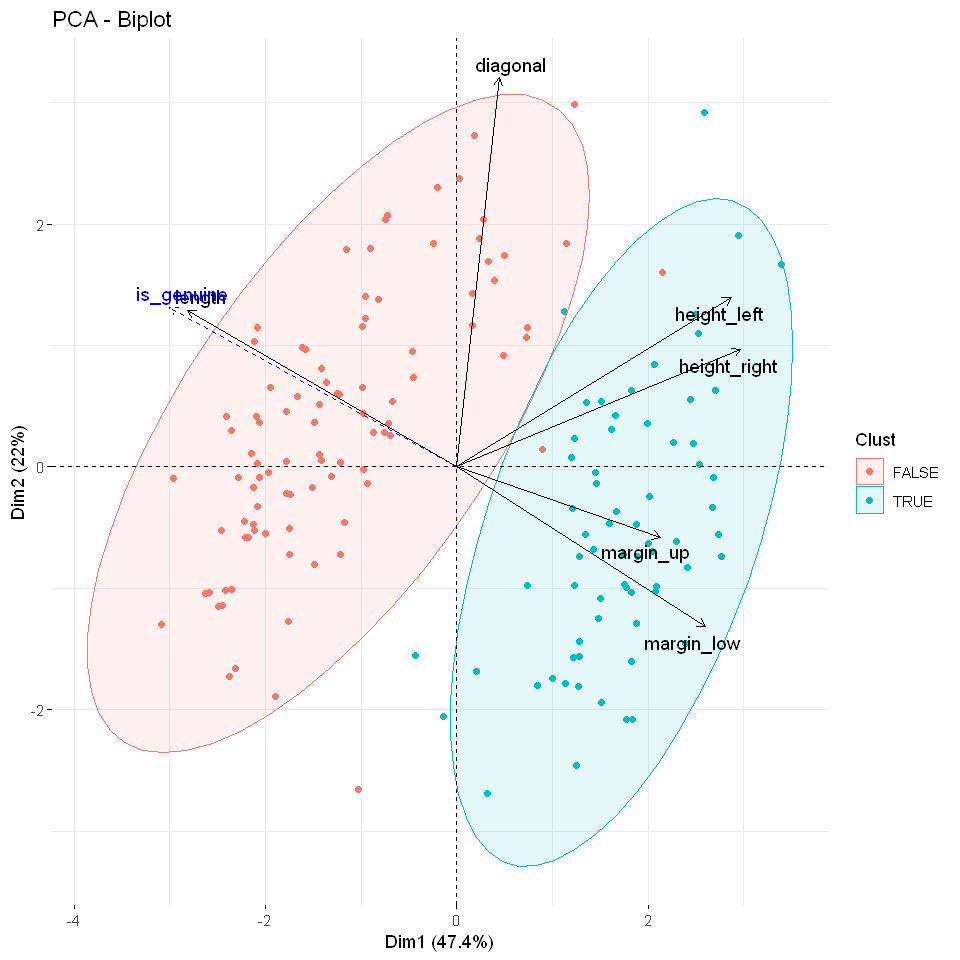

In [45]:
fviz_pca_biplot (billets_acp2,
                col.ind = kmean_clust$clust, palette = "jco",
                addEllipses = TRUE, label = c("var") ,
                col.var = "black", repel = TRUE,
                 select.ind = list(cos2 = 0.25),
                legend.title = "Clust")

dev.print(device = png, file = "kmean is genuine dim12", width = 600)


In [46]:
confusionMatrix(table(kmean_clust$clust, kmean_clust$is_genuine))

Confusion Matrix and Statistics

       
        FALSE TRUE
  FALSE     2   99
  TRUE     68    1
                                          
               Accuracy : 0.0176          
                 95% CI : (0.0037, 0.0507)
    No Information Rate : 0.5882          
    P-Value [Acc > NIR] : 1.00000         
                                          
                  Kappa : -0.9015         
                                          
 Mcnemar's Test P-Value : 0.02026         
                                          
            Sensitivity : 0.02857         
            Specificity : 0.01000         
         Pos Pred Value : 0.01980         
         Neg Pred Value : 0.01449         
             Prevalence : 0.41176         
         Detection Rate : 0.01176         
   Detection Prevalence : 0.59412         
      Balanced Accuracy : 0.01929         
                                          
       'Positive' Class : FALSE           
                                          

In [47]:
precision_vrai_positif = 100 - round((2/70) * 100,2)
precision_vrai_positif

[1] 97.14

In [48]:
precision_vrai_negatif = 100 - round((1/100) * 100,2)
precision_vrai_negatif

[1] 99

In [49]:
precision_dectetion_billets <- c(precision_vrai_positif,precision_vrai_negatif)
precision_dectetion_billets <- mean(precision_dectetion_billets)
precision_dectetion_billets

[1] 98.07

# M3 - Prediction

Notre jeu de données comprend 170 individus, nous choisissons donc de découper en 5 folds pour notre validation croisée notre jeu de données. 

In [50]:
# features matrix that has to be divided in folds for performing cross validation

cvIndex <- createFolds(factor(billets$is_genuine), 
                      5, #number of folds
                       list=T, #a logical - should the results be in a list (TRUE) or a matrix
                       returnTrain = T ) #a logical. When true, the values returned are the sample positions corresponding to the data used during training. This argument only works in conjunction with list = TRUE

 str(cvIndex)

List of 5
 $ Fold1: int [1:136] 1 2 3 5 6 8 9 10 11 12 ...
 $ Fold2: int [1:136] 1 2 3 4 7 9 10 11 14 15 ...
 $ Fold3: int [1:136] 1 4 5 6 7 8 9 12 13 14 ...
 $ Fold4: int [1:136] 2 3 4 5 6 7 8 9 10 11 ...
 $ Fold5: int [1:136] 1 2 3 4 5 6 7 8 10 11 ...


On choisi la méthode de rééchantillonnage pour les test, ici la validation croisée. 

La validation croisée permet de découper en k folds mes données et ainsi d'utiliser chaque folds comme jeu de test et le reste comme jeu d'entrainement. 

Tout le jeu de test est utilisé comme jeu de test et d'entrainement in finé.

On choisi généralement k = 5 ou k= 10 en fonction de la taille de jeu de donnée et du temps de calcul lié. 

In [51]:
#évaluation par rééchantillonnage

train.control <- trainControl(index = cvIndex, 
                              method = "cv", #cross validation
                              number = 5) # Either the number of folds or number of resampling iterations

str(train.control)

List of 27
 $ method           : chr "cv"
 $ number           : num 5
 $ repeats          : logi NA
 $ search           : chr "grid"
 $ p                : num 0.75
 $ initialWindow    : NULL
 $ horizon          : num 1
 $ fixedWindow      : logi TRUE
 $ skip             : num 0
 $ verboseIter      : logi FALSE
 $ returnData       : logi TRUE
 $ returnResamp     : chr "final"
 $ savePredictions  : logi FALSE
 $ classProbs       : logi FALSE
 $ summaryFunction  :function (data, lev = NULL, model = NULL)  
 $ selectionFunction: chr "best"
 $ preProcOptions   :List of 6
  ..$ thresh   : num 0.95
  ..$ ICAcomp  : num 3
  ..$ k        : num 5
  ..$ freqCut  : num 19
  ..$ uniqueCut: num 10
  ..$ cutoff   : num 0.9
 $ sampling         : NULL
 $ index            :List of 5
  ..$ Fold1: int [1:136] 1 2 3 5 6 8 9 10 11 12 ...
  ..$ Fold2: int [1:136] 1 2 3 4 7 9 10 11 14 15 ...
  ..$ Fold3: int [1:136] 1 4 5 6 7 8 9 12 13 14 ...
  ..$ Fold4: int [1:136] 2 3 4 5 6 7 8 9 10 11 ...
  ..$ Fold5: int

Changement de type de donnée pour les opérations futures on passe de `logical` à `numeric` en deux étapes :

In [52]:
billets <- transform(billets, is_genuine = as.character(is_genuine)) 

# Le cluster 1 correspond aux vrais billets.
billets$is_genuine[billets$is_genuine=='TRUE']<-1

# Le cluster 2 correspond aux faux billets.
billets$is_genuine[billets$is_genuine=='FALSE']<-0


billets <- transform(billets, is_genuine = as.numeric(is_genuine)) 

head(billets)

is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1,171.81,104.86,104.95,4.52,2.89,112.83
1,171.67,103.74,103.70,4.01,2.87,113.29
1,171.83,103.76,103.76,4.40,2.88,113.84
1,171.80,103.78,103.65,3.73,3.12,113.63
1,172.05,103.70,103.75,5.04,2.27,113.55
1,172.57,104.65,104.44,4.54,2.99,113.16


On procède à une régression logistique pas-à-pas ascendante et descendante.

La régression logistique est utilisée lorsque les variables à expliquer sont binaires. 

Pour rappel une régression linaire multiple ne fonctionne que si la variable à expliquée est quantitative or ici elle est qualitative. 

Le fait que la procédure soit pas-à-pas permet de vérifier la significativité de chaque variable géométrique et des associations de ces variables dans la détermination de l'authenticité du billet. 

On ajoute et on enlève des variables pour obtenir l'association qui minimise l'AIC (Akaike’s Information Criteria), ainsi on afine le modèle évitant tout risque de sûr apprentissage. 

In [53]:
modele <- train(is_genuine ~ ., data = billets, method="glmStepAIC", direction = 'both', trControl=train.control)

Warning message in train.default(x, y, weights = w, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column."

Start:  AIC=-75.92
.outcome ~ diagonal + height_left + height_right + margin_low + 
    margin_up + length

               Df Deviance     AIC
- diagonal      1   4.0536 -77.822
- height_left   1   4.0980 -76.343
<none>              4.0507 -75.919
- height_right  1   4.1113 -75.900
- length        1   4.8605 -53.134
- margin_up     1   6.6463 -10.577
- margin_low    1   8.4323  21.792

Step:  AIC=-77.82
.outcome ~ height_left + height_right + margin_low + margin_up + 
    length

               Df Deviance     AIC
- height_right  1   4.1115 -77.896
- height_left   1   4.1117 -77.886
<none>              4.0536 -77.822
+ diagonal      1   4.0507 -75.919
- length        1   4.8647 -55.017
- margin_up     1   6.6906 -11.674
- margin_low    1   8.9744  28.265

Step:  AIC=-77.9
.outcome ~ height_left + margin_low + margin_up + length

               Df Deviance     AIC
- height_left   1   4.1245 -79.466
<none>              4.1115 -77.896
+ height_right  1   4.0536 -77.822
+ diagonal      1  

__Test de wald à voir__

AIC pour les variables height_left + height_right + margin_low + margin_up + length : -112.71

AIC pour les variables margin_low + margin_up + length : -112.45.

La différence d'AIC est de 0.26 avec plus ou moins deux variables, c'est une faible différence. 

Trois variables suffisent donc, c'est trois variables correspondent à celle que nous avions déterminées précédement comme étant le plus déterminante pour établir l'authenticité d'un billet. 

In [54]:
modele

Generalized Linear Model with Stepwise Feature Selection 

170 samples
  6 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 136, 136, 136, 136, 136 
Resampling results:

  RMSE       Rsquared   MAE      
  0.1727342  0.8768745  0.1355131


In [55]:
modele$resample

RMSE,Rsquared,MAE,Resample
0.1522317,0.9101029,0.1215618,Fold1
0.2067225,0.8246085,0.1646116,Fold2
0.1918470,0.8496946,0.1515661,Fold3
0.1648993,0.8897132,0.1337983,Fold4
0.1479707,0.9102534,0.1060279,Fold5


Le coefficient de corrélation est environ de 87.87% le modèle est donc fiable. 

In [56]:
billets_test = select(billets,is_genuine,margin_low,margin_up,length )

In [57]:
modele_final = train(is_genuine ~ ., data = billets_test, method="glm", trControl=train.control)

Warning message in train.default(x, y, weights = w, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column."

In [58]:
prediction = predict(modele_final, newdata = billets_test)

In [59]:
pred_billets = billets
pred_billets$prediction = prediction

pred_billets$prediction[pred_billets$prediction>0.5]<-1
pred_billets$prediction[pred_billets$prediction<0.5]<-0

pred_billets$is_genuine = as.logical(pred_billets$is_genuine)
pred_billets$prediction = as.logical(pred_billets$prediction)

table(pred_billets$is_genuine, pred_billets$prediction)

       
        FALSE TRUE
  FALSE    70    0
  TRUE      0  100

La détection est parfaite.

EXAMPLE : 

Nous appliquons l'algorithme au nouveau jeu : 

In [60]:
example = read_csv('/Users/octav/Google Drive/OC_Data Analyst_GORAM Octave/Projets/Projet 6/csv/example.csv')

example

Parsed with column specification:
cols(
  diagonal = col_double(),
  height_left = col_double(),
  height_right = col_double(),
  margin_low = col_double(),
  margin_up = col_double(),
  length = col_double(),
  id = col_character()
)


diagonal,height_left,height_right,margin_low,margin_up,length,id
171.76,104.01,103.54,5.21,3.30,111.42,A_1
171.87,104.17,104.13,6.00,3.31,112.09,A_2
172.00,104.58,104.29,4.99,3.39,111.57,A_3
172.49,104.55,104.34,4.44,3.03,113.20,A_4
171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [61]:
prediction <- function(a) {
  a$prediction <- predict(modele_final, newdata = a)

a$prediction[a$prediction>0.5]<-1
a$prediction[a$prediction<0.5]<-0

a$prediction = as.logical(a$prediction)
    
  return(a)
}

prediction(example)

diagonal,height_left,height_right,margin_low,margin_up,length,id,prediction
171.76,104.01,103.54,5.21,3.30,111.42,A_1,FALSE
171.87,104.17,104.13,6.00,3.31,112.09,A_2,FALSE
172.00,104.58,104.29,4.99,3.39,111.57,A_3,FALSE
172.49,104.55,104.34,4.44,3.03,113.20,A_4,TRUE
171.65,103.63,103.56,3.77,3.16,113.33,A_5,TRUE


In [62]:
example = read_csv('/Users/octav/Google Drive/OC_Data Analyst_GORAM Octave/Projets/Projet 6/csv/example_test[3228].csv')


Parsed with column specification:
cols(
  diagonal = col_double(),
  height_left = col_double(),
  height_right = col_double(),
  margin_low = col_double(),
  margin_up = col_double(),
  length = col_double(),
  id = col_character()
)


In [63]:
example

diagonal,height_left,height_right,margin_low,margin_up,length,id
171.60,104.01,103.24,5.21,3.30,111.42,A_1
171.87,104.17,104.13,6.00,3.31,112.09,A_2
172.00,104.78,104.29,4.99,3.39,111.57,A_3
170.49,104.55,104.34,4.43,3.03,113.20,A_4
171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [64]:
prediction(example)

diagonal,height_left,height_right,margin_low,margin_up,length,id,prediction
171.60,104.01,103.24,5.21,3.30,111.42,A_1,FALSE
171.87,104.17,104.13,6.00,3.31,112.09,A_2,FALSE
172.00,104.78,104.29,4.99,3.39,111.57,A_3,FALSE
170.49,104.55,104.34,4.43,3.03,113.20,A_4,TRUE
171.65,103.63,103.56,3.77,3.16,113.33,A_5,TRUE
